In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training1-dataset/equip_failures_training_set.csv


**Importing the libraries**

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

**Reading the dataset**

In [4]:
df = pd.read_csv("/kaggle/input/training1-dataset/equip_failures_training_set.csv")

**Exploring the dataset**

In [5]:
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
df.shape

(60000, 172)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: int64(3), object(169)
memory usage: 78.7+ MB


In [8]:
df.describe()

,id,target,sensor1_measure
count,60000.000000,60000.000000,6.000000e+04
mean,30000.500000,0.016667,5.933650e+04
std,17320.652413,0.128020,1.454301e+05
min,1.000000,0.000000,0.000000e+00
25%,15000.750000,0.000000,8.340000e+02
50%,30000.500000,0.000000,3.077600e+04
75%,45000.250000,0.000000,4.866800e+04
max,60000.000000,1.000000,2.746564e+06


In [9]:
df.columns

Index(['id', 'target', 'sensor1_measure', 'sensor2_measure', 'sensor3_measure',
       'sensor4_measure', 'sensor5_measure', 'sensor6_measure',
       'sensor7_histogram_bin0', 'sensor7_histogram_bin1',
       ...
       'sensor105_histogram_bin2', 'sensor105_histogram_bin3',
       'sensor105_histogram_bin4', 'sensor105_histogram_bin5',
       'sensor105_histogram_bin6', 'sensor105_histogram_bin7',
       'sensor105_histogram_bin8', 'sensor105_histogram_bin9',
       'sensor106_measure', 'sensor107_measure'],
      dtype='object', length=172)

In [10]:
df['sensor1_measure'][0]

76698

Failure:  1000  Normal:  59000


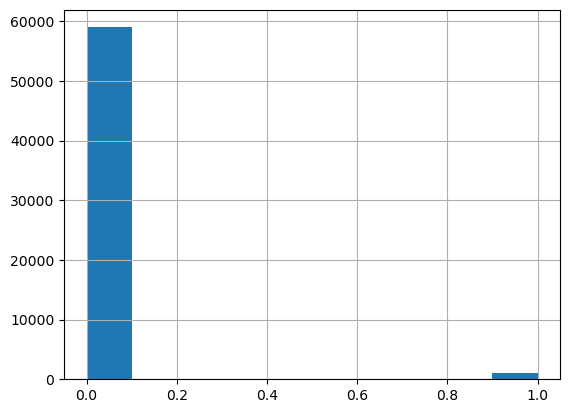

In [11]:
print("Failure: ",  df.target.sum(), ' Normal: ', df.shape[0]-df.target.sum())
df.target.hist()

plt.show()

In [12]:
df['sensor2_measure'][0]

'na'

In [13]:
#Calculating null values ratio
nan_ratio=[]
for i in df.columns:
    rat=round((df[i]=='na').sum()/df.shape[0],2)
    nan_ratio.append(rat)

nan_ratio=pd.DataFrame({'Feature':df.columns,'na ratio':nan_ratio}).sort_values('na ratio', ascending=False)

In [14]:
nan_ratio.head()

,Feature,na ratio
80,sensor43_measure,0.82
79,sensor42_measure,0.81
78,sensor41_measure,0.80
114,sensor68_measure,0.77
3,sensor2_measure,0.77


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: int64(3), object(169)
memory usage: 78.7+ MB


**Imputing the null values**

In [16]:
print(df.isnull().sum().head(50))

id                         0
target                     0
sensor1_measure            0
sensor2_measure            0
sensor3_measure            0
sensor4_measure            0
sensor5_measure            0
sensor6_measure            0
sensor7_histogram_bin0     0
sensor7_histogram_bin1     0
sensor7_histogram_bin2     0
sensor7_histogram_bin3     0
sensor7_histogram_bin4     0
sensor7_histogram_bin5     0
sensor7_histogram_bin6     0
sensor7_histogram_bin7     0
sensor7_histogram_bin8     0
sensor7_histogram_bin9     0
sensor8_measure            0
sensor9_measure            0
sensor10_measure           0
sensor11_measure           0
sensor12_measure           0
sensor13_measure           0
sensor14_measure           0
sensor15_measure           0
sensor16_measure           0
sensor17_measure           0
sensor18_measure           0
sensor19_measure           0
sensor20_measure           0
sensor21_measure           0
sensor22_measure           0
sensor23_measure           0
sensor24_histo

In [17]:
# Remove all null value
df.dropna(inplace=True)
df.drop(labels=["id"],axis=1,inplace=True)
df.drop(labels=["sensor79_measure"],axis=1,inplace=True)
df.drop(labels=["sensor77_measure"],axis=1,inplace=True)
df.drop(labels=["sensor90_measure"],axis=1,inplace=True)
df.drop(labels=["sensor73_measure"],axis=1,inplace=True)
df.drop(labels=["sensor5_measure"],axis=1,inplace=True)
df.drop(labels=["sensor75_measure"],axis=1,inplace=True)
df.drop(labels=["sensor7_histogram_bin3"],axis=1,inplace=True)

df.reset_index(drop=True,inplace=True)


**Preprocessing the data**

In [18]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [19]:
#Encoding the categorical data
cat_cols = df.select_dtypes(include=["object"]).columns
df = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 164 entries, target to sensor107_measure
dtypes: int64(164)
memory usage: 75.1 MB


**Selecting the important features of the dataset using Mutual Information**

In [21]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#id4

In [22]:
X = df.iloc[:,1:-1]
y = df["target"]

In [23]:
mic = SelectKBest(score_func=mutual_info_classif,k=50)

In [24]:
mic.fit(X,y)

SelectKBest(k=50, score_func=<function mutual_info_classif at 0x7875e82f81f0>)

In [25]:
#Features alongwith its mutual information score value
feature_MI_score = pd.Series(mic.scores_,index=X.columns)
feature_MI_score.sort_values(ascending=False, inplace=True)
feature_MI_score.head(50)

sensor1_measure            0.041131
sensor43_measure           0.036234
sensor42_measure           0.034801
sensor41_measure           0.034022
sensor39_measure           0.033236
sensor40_measure           0.033105
sensor7_histogram_bin1     0.015631
sensor9_measure            0.015173
sensor82_measure           0.014307
sensor81_measure           0.013896
sensor18_measure           0.013893
sensor88_measure           0.013817
sensor86_measure           0.013641
sensor83_measure           0.013630
sensor7_histogram_bin2     0.013341
sensor87_measure           0.013296
sensor3_measure            0.013203
sensor85_measure           0.013005
sensor38_measure           0.012680
sensor84_measure           0.012482
sensor11_measure           0.012295
sensor64_histogram_bin0    0.011787
sensor51_measure           0.011739
sensor68_measure           0.011665
sensor55_measure           0.011634
sensor29_measure           0.011202
sensor2_measure            0.010379
sensor95_measure           0

In [26]:
df_afs=mic.fit_transform(X,y)

In [27]:
df_afs.shape

(60000, 50)

**Creating a new dataframe df2 with the top 50 features based upon Mutual Information scores**

In [28]:
df2 = df[['target','sensor1_measure',
          'sensor43_measure',
'sensor42_measure',
'sensor41_measure',
'sensor39_measure',
'sensor40_measure',
'sensor7_histogram_bin1',
'sensor9_measure',
'sensor3_measure',
'sensor81_measure',
'sensor82_measure',
'sensor85_measure',
'sensor38_measure',
'sensor11_measure',
'sensor84_measure',
'sensor7_histogram_bin2',
'sensor18_measure',
'sensor87_measure',
'sensor88_measure',
'sensor83_measure',
'sensor86_measure',
'sensor64_histogram_bin0',
'sensor29_measure',
'sensor51_measure',
'sensor55_measure',
'sensor55_measure',
'sensor2_measure',
'sensor96_measure',
'sensor30_measure',
'sensor106_measure',
'sensor68_measure',
'sensor65_measure',
'sensor98_measure',
'sensor95_measure',
'sensor101_measure',
'sensor97_measure',
'sensor4_measure',
'sensor100_measure',
'sensor102_measure',
'sensor56_measure',
'sensor94_measure',
'sensor92_measure',
'sensor57_measure',
'sensor36_measure',
'sensor37_measure',
'sensor6_measure',
'sensor13_measure',
'sensor71_measure',
'sensor58_measure',
'sensor78_measure']].copy()

In [29]:
#Using the initial 5000 rows for training and testing the model to find out the best model
df2=df2.drop(df2.index[5000:])

**Exploring the new dataframe df2**

In [30]:
df2.info

<bound method DataFrame.info of       target  sensor1_measure  sensor43_measure  sensor42_measure  \
0          0            76698              3806              4276   
1          0            33058              3806              4276   
2          0            41040              3806              4276   
3          0               12              3806              4276   
4          0            60874              3806              4276   
...      ...              ...               ...               ...   
4995       0             2314              3806              4276   
4996       0            30294              3806              4276   
4997       0            40558                 0                 0   
4998       0             1696              3806              4276   
4999       0               26              3806              4276   

      sensor41_measure  sensor39_measure  sensor40_measure  \
0                 4968              4801              3579   
1              

In [31]:
df2.shape

(5000, 51)

In [32]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
target,5000.0,0.0178,0.132237,0.0,0.00,0.0,0.00,1.0
sensor1_measure,5000.0,59168.9616,138948.918666,0.0,1023.50,31282.0,49092.00,1793716.0
sensor43_measure,5000.0,3291.6246,1202.253487,0.0,3806.00,3806.0,3806.00,3806.0
sensor42_measure,5000.0,3686.1226,1347.701273,0.0,4276.00,4276.0,4276.00,4276.0
sensor41_measure,5000.0,4254.7642,1573.239618,0.0,4968.00,4968.0,4968.00,4968.0
sensor39_measure,5000.0,5834.7916,2357.030451,0.0,6108.50,7096.0,7096.00,7096.0
sensor40_measure,5000.0,4928.1564,1881.173400,0.0,5838.00,5838.0,5838.00,5838.0
sensor7_histogram_bin1,5000.0,12.0552,79.658416,0.0,0.00,0.0,0.00,617.0
sensor9_measure,5000.0,231.5594,783.626921,0.0,0.00,0.0,0.00,4055.0
sensor3_measure,5000.0,912.7630,687.015109,0.0,298.75,676.0,1553.00,2061.0


In [33]:
print(str('Any missing data or NaN in the dataset:'),df2.isnull().values.any())

Any missing data or NaN in the dataset: False


                           target  sensor1_measure  sensor43_measure  \
target                   1.000000         0.575389         -0.095488   
sensor1_measure          0.575389         1.000000         -0.214960   
sensor43_measure        -0.095488        -0.214960          1.000000   
sensor42_measure        -0.084863        -0.210309          0.971697   
sensor41_measure        -0.080256        -0.213523          0.935743   
sensor39_measure        -0.057301        -0.202712          0.807825   
sensor40_measure        -0.070622        -0.203146          0.879289   
sensor7_histogram_bin1   0.145543         0.153773          0.005535   
sensor9_measure          0.246783         0.300111         -0.054072   
sensor3_measure          0.088142         0.113295          0.014291   
sensor81_measure         0.220756         0.399636         -0.413924   
sensor82_measure         0.217769         0.389590         -0.408284   
sensor85_measure         0.226604         0.422584         -0.42

<Axes: >

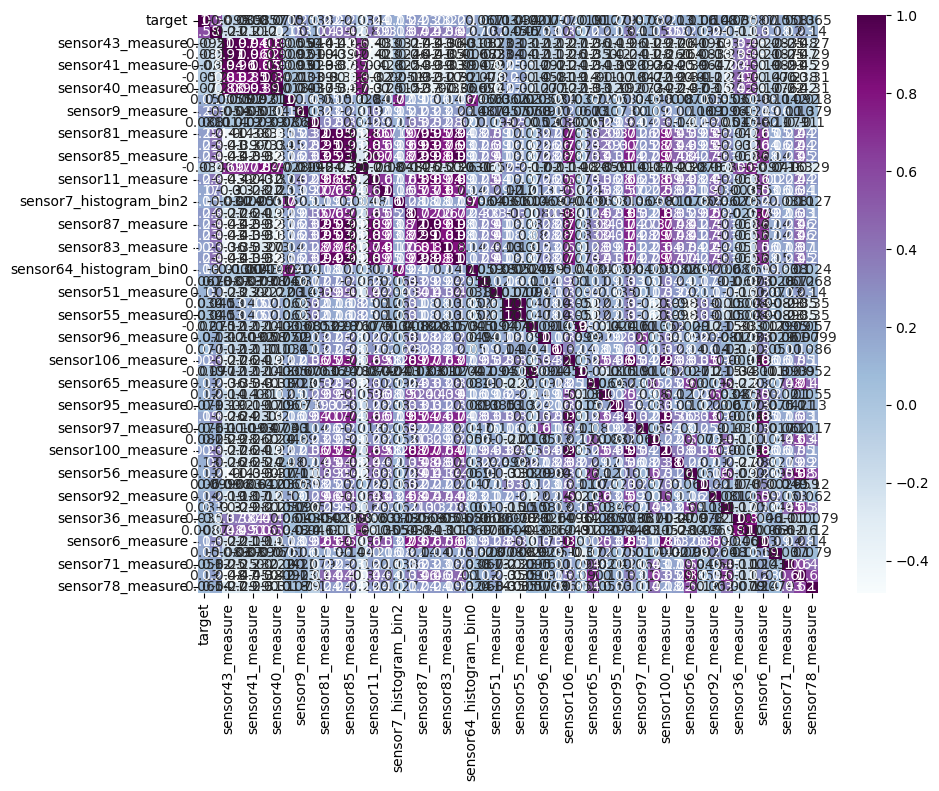

In [34]:
#Plotting a heatmap of the features
corr_var=df2.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')


**Implementing the model Logistic Regression on our dataset**

In [35]:
X = df2.drop('target',axis=1)
print(df2.shape)
y = df2['target']
print(X.shape)
print(y.shape)

(5000, 51)
(5000, 50)
(5000,)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (4000, 50)
y_train: (4000,)
X_test: (1000, 50)
y_test: (1000,)


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train) 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
from sklearn import metrics
prediction=classifier.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.985


In [40]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='micro')
print("F1-score:", f1)

F1-score: 0.985


In [41]:
import time
start=time.time()

print(time.time()-start)

0.00010061264038085938


****Implementing the model Random Forest on our dataset****

In [42]:
X1 = df2.drop('target',axis=1)
y1 = df2['target']


In [43]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split (X1, y1, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train1))
print('y_train:', np.shape(y_train1))
print('X_test:', np.shape(X_test1))
print('y_test:', np.shape(y_test1))

Total no. of samples: Training and Testing dataset separately!
X_train: (4000, 50)
y_train: (4000,)
X_test: (1000, 50)
y_test: (1000,)


In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train1, y_train1) 

RandomForestRegressor(n_estimators=1000, random_state=42)

In [45]:
# Use the forest's predict method on the test data
predic = rf.predict(X_test1).round()
# Calculate the absolute errors
errors = abs(predic - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, predic))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       987
           1       0.56      0.38      0.45        13

    accuracy                           0.99      1000
   macro avg       0.77      0.69      0.72      1000
weighted avg       0.99      0.99      0.99      1000



In [47]:
import time
start=time.time()

print(time.time()-start)

3.910064697265625e-05


In [48]:
accuracy = rf.score(X_test1, y_test1)
print("Accuracy:", accuracy*100)

Accuracy: 25.938890187826335


In [49]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test1, predic, average='micro')
print("F1-score:", f1)

F1-score: 0.988


****Implementing the model XGBoost on our dataset****

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
X2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:,-1].values

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=7)

In [58]:
model = xgb.XGBClassifier()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train2 = le.fit_transform(y_train2)

In [60]:
model.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [61]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [62]:
y_pred = model.predict(X_test2)

In [63]:
predict = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test2, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 1.64%


In [64]:
f1 = f1_score(y_test2,y_pred,average='micro')
print("F1 score: {:.4f}".format(f1))

F1 score: 0.0164


**To analyse which one of the model is a better one**

In [66]:
column_sums = np.sum(df, axis=0)

# Print the column sums
print("Column Sums:")
column_sums.head(50)


Column Sums:


target                           1000
sensor1_measure            3560189974
sensor2_measure               1373248
sensor3_measure              54321942
sensor4_measure              69396804
sensor6_measure               1406620
sensor7_histogram_bin0         117925
sensor7_histogram_bin1         641903
sensor7_histogram_bin2        5463077
sensor7_histogram_bin4      668993185
sensor7_histogram_bin5     1193422100
sensor7_histogram_bin6     1202264175
sensor7_histogram_bin7      718106614
sensor7_histogram_bin8      332340706
sensor7_histogram_bin9       52703199
sensor8_measure            1316552679
sensor9_measure              14088865
sensor10_measure              5885945
sensor11_measure               734666
sensor12_measure            104002838
sensor13_measure            119172305
sensor14_measure           1451227745
sensor15_measure           1449514609
sensor16_measure           1338745035
sensor17_measure           1075461549
sensor18_measure               257443
sensor19_mea

In [67]:
print(column_sums[50:100])

sensor25_histogram_bin9        587779
sensor26_histogram_bin0    1356712217
sensor26_histogram_bin1    1198766774
sensor26_histogram_bin2    1053892107
sensor26_histogram_bin3    1004992795
sensor26_histogram_bin4     942752236
sensor26_histogram_bin5     898031250
sensor26_histogram_bin6     892740434
sensor26_histogram_bin7     681240177
sensor26_histogram_bin8     203838533
sensor26_histogram_bin9      67280590
sensor27_measure           1477174200
sensor28_measure             58752587
sensor29_measure            104932558
sensor30_measure            105062203
sensor31_measure             19353240
sensor32_measure           1316277417
sensor33_measure            712185581
sensor34_measure           1279411874
sensor35_measure           1164476855
sensor36_measure            485897252
sensor37_measure            479670089
sensor38_measure            426288426
sensor39_measure            350754147
sensor40_measure            295443433
sensor41_measure            254704149
sensor42_mea

In [68]:
print(column_sums[100:150])

sensor64_histogram_bin2     221604470
sensor64_histogram_bin3     981295932
sensor64_histogram_bin4    1235809935
sensor64_histogram_bin5    1172487482
sensor64_histogram_bin6     942906564
sensor64_histogram_bin7     542502981
sensor64_histogram_bin8     235351161
sensor64_histogram_bin9      53609531
sensor65_measure             56264654
sensor66_measure             62394448
sensor67_measure           1476969928
sensor68_measure              3431285
sensor69_histogram_bin0     255405044
sensor69_histogram_bin1     105125389
sensor69_histogram_bin2     812141704
sensor69_histogram_bin3    1045541684
sensor69_histogram_bin4    1037378841
sensor69_histogram_bin5    1271038354
sensor69_histogram_bin6    1210055634
sensor69_histogram_bin7     467401712
sensor69_histogram_bin8      17192830
sensor69_histogram_bin9         97936
sensor70_measure             93787823
sensor71_measure            124203517
sensor72_measure           1184620994
sensor74_measure             12983447
sensor76_mea

In [69]:
print(column_sums[150:171])

sensor103_measure           1038889633
sensor104_measure            123660891
sensor105_histogram_bin0    1264477462
sensor105_histogram_bin1    1112709824
sensor105_histogram_bin2    1010649632
sensor105_histogram_bin3     956163100
sensor105_histogram_bin4    1034355055
sensor105_histogram_bin5    1037346568
sensor105_histogram_bin6     901680408
sensor105_histogram_bin7     813141632
sensor105_histogram_bin8     521281291
sensor105_histogram_bin9     138818229
sensor106_measure                79396
sensor107_measure               143889
dtype: int64


**Conclusion-
The f1-score of the Random Forest model is the highest hence choosing Random Forest for building the pipeline and implementing GridSearchCV because we have an imbalanced dataset and f1-score is the best measure to analyse such a datset which captures the details of all the features promptly**